In [1]:
!pip install pandas_datareader
!pip install pmdarima

import os 

import pandas_datareader.data as pdr 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

import matplotlib.pyplot as plt 
import matplotlib 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima 

import seaborn as sns 

plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

In [2]:
import pandas as pd 

data = pd.read_csv('갤러리아.csv')
data['day'] = pd.to_datetime(data['day'])
data = data.set_index('day')

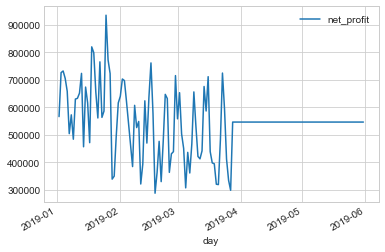

In [3]:
 fig = data.plot()

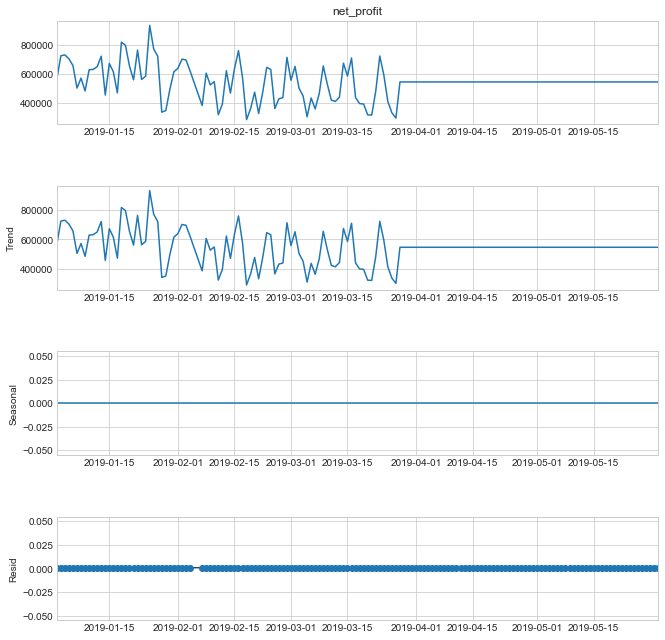

In [4]:
decomposition = sm.tsa.seasonal_decompose(data['net_profit'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [5]:
train_data, test_data = train_test_split(data, test_size=0.45, shuffle=False)

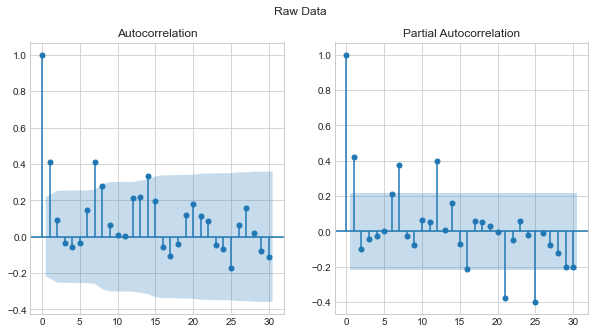

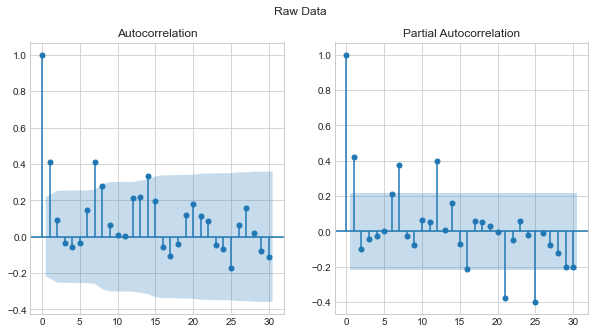

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Raw Data")
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1])

In [7]:
# Differencing 

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['net_profit'].diff()
diff_train_data = diff_train_data.dropna()
print('###### Raw Data ######')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)

###### Raw Data ######
            net_profit
day                   
2019-01-02    566085.0
2019-01-03    726360.0
2019-01-04    732362.0
2019-01-05    705722.0
2019-01-06    658637.0
...                ...
2019-03-21    318450.0
2019-03-22    482453.0
2019-03-23    724816.0
2019-03-24    595087.0
2019-03-25    411180.0

[81 rows x 1 columns]
### Differenced Data ###
day
2019-01-03    160275.0
2019-01-04      6002.0
2019-01-05    -26640.0
2019-01-06    -47085.0
2019-01-07   -154635.0
                ...   
2019-03-21     -1275.0
2019-03-22    164003.0
2019-03-23    242363.0
2019-03-24   -129729.0
2019-03-25   -183907.0
Name: net_profit, Length: 80, dtype: float64


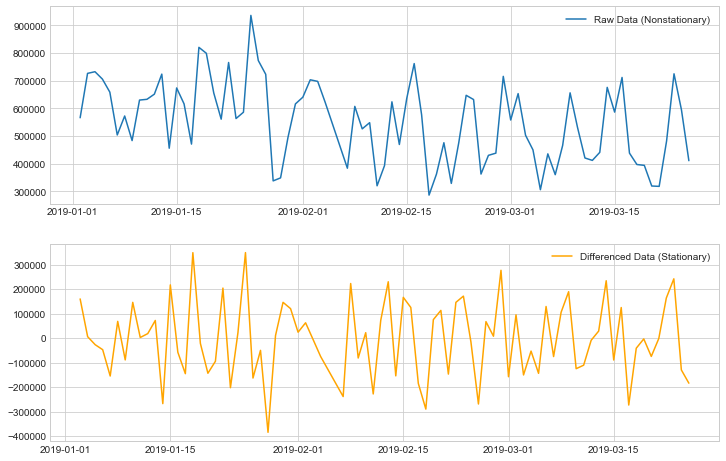

In [8]:
#Differenced data plot
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['net_profit'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


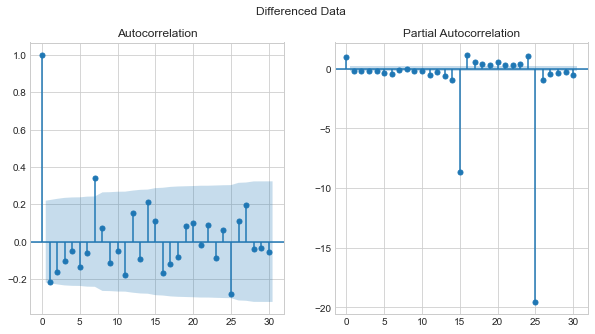

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

In [10]:
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()

model_fit.summary()

/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   80
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1068.157
Method:                       css-mle   S.D. of innovations         152163.858
Date:                Fri, 01 Apr 2022   AIC                           2142.313
Time:                        21:43:24   BIC                           2149.460
Sample:                             1   HQIC                          2145.179
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1936.3125    1.4e+04     -0.138      0.890   -2.93e+04    2.55e+04
ar.L1.D.y     -0.2191      0.110     -1.991      0.046      -0.435      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5647           +0.0000j            4.5647            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# Parameter search 

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  print(f'ARIMA: {i} >>AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 1, 0) >>AIC : 2144.18
ARIMA: (0, 1, 1) >>AIC : 2123.69
ARIMA: (0, 1, 2) >>AIC : 2116.22
ARIMA: (1, 1, 0) >>AIC : 2142.31


/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.wa

ARIMA: (1, 1, 1) >>AIC : 2117.63
ARIMA: (1, 1, 2) >>AIC : 2118.17
ARIMA: (2, 1, 0) >>AIC : 2140.2


/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newpar

ARIMA: (2, 1, 1) >>AIC : 2116.72


LinAlgError: SVD did not converge

In [12]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [13]:
# Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((0, 1, 2), 2116.22)]

In [33]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

/Users/hyungjucha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   80
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1054.109
Method:                       css-mle   S.D. of innovations         124603.512
Date:                Wed, 06 Apr 2022   AIC                           2116.219
Time:                        03:08:48   BIC                           2125.747
Sample:                             1   HQIC                          2120.039
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2527.7128    789.062     -3.203      0.001   -4074.247    -981.179
ma.L1.D.y     -0.6546      0.105     -6.217      0.000      -0.861      -0.448
ma.L2.D.y     -0.3452      0.100     -3.451      0.001      -0.541      -0.149
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -2.8962           +0.0000j            2.8962            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
test_data

,net_profit
day,
2019-03-26,334002.0000
2019-03-27,297634.0000
2019-03-28,546217.3735
2019-03-29,546217.3735
2019-03-30,546217.3735
...,...
2019-05-27,546217.3735
2019-05-28,546217.3735
2019-05-29,546217.3735


In [35]:
pred

(array([427893.24594218, 445777.0647083 , 443249.35189093, 440721.63907356,
        438193.92625619, 435666.21343883, 433138.50062146, 430610.78780409,
        428083.07498672, 425555.36216935, 423027.64935198, 420499.93653461,
        417972.22371724, 415444.51089987, 412916.7980825 , 410389.08526513,
        407861.37244776, 405333.65963039, 402805.94681302, 400278.23399565,
        397750.52117828, 395222.80836091, 392695.09554354, 390167.38272617,
        387639.6699088 , 385111.95709143, 382584.24427406, 380056.53145669,
        377528.81863932, 375001.10582195, 372473.39300458, 369945.68018722,
        367417.96736985, 364890.25455248, 362362.54173511, 359834.82891774,
        357307.11610037, 354779.403283  , 352251.69046563, 349723.97764826,
        347196.26483089, 344668.55201352, 342140.83919615, 339613.12637878,
        337085.41356141, 334557.70074404, 332029.98792667, 329502.2751093 ,
        326974.56229193, 324446.84947456, 321919.13665719, 319391.42383982,
        3168

In [25]:
test_data

,net_profit
day,
2019-03-26,334002.0000
2019-03-27,297634.0000
2019-03-28,546217.3735
2019-03-29,546217.3735
2019-03-30,546217.3735
...,...
2019-05-27,546217.3735
2019-05-28,546217.3735
2019-05-29,546217.3735


In [26]:
pred

(array([427893.24594218, 445777.0647083 , 443249.35189093, 440721.63907356,
        438193.92625619, 435666.21343883, 433138.50062146, 430610.78780409,
        428083.07498672, 425555.36216935, 423027.64935198, 420499.93653461,
        417972.22371724, 415444.51089987, 412916.7980825 , 410389.08526513,
        407861.37244776, 405333.65963039, 402805.94681302, 400278.23399565,
        397750.52117828, 395222.80836091, 392695.09554354, 390167.38272617,
        387639.6699088 , 385111.95709143, 382584.24427406, 380056.53145669,
        377528.81863932, 375001.10582195, 372473.39300458, 369945.68018722,
        367417.96736985, 364890.25455248, 362362.54173511, 359834.82891774,
        357307.11610037, 354779.403283  , 352251.69046563, 349723.97764826,
        347196.26483089, 344668.55201352, 342140.83919615, 339613.12637878,
        337085.41356141, 334557.70074404, 332029.98792667, 329502.2751093 ,
        326974.56229193, 324446.84947456, 321919.13665719, 319391.42383982,
        3168

In [30]:
pred[2][:,1]

array([672111.64138291, 704151.46682522, 701623.75634143, 699096.04585764,
       696568.33537385, 694040.62489006, 691512.91440627, 688985.20392248,
       686457.4934387 , 683929.78295491, 681402.07247112, 678874.36198733,
       676346.65150354, 673818.94101975, 671291.23053596, 668763.52005217,
       666235.80956838, 663708.09908459, 661180.3886008 , 658652.67811701,
       656124.96763322, 653597.25714943, 651069.54666564, 648541.83618185,
       646014.12569806, 643486.41521427, 640958.70473048, 638430.99424669,
       635903.2837629 , 633375.57327911, 630847.86279532, 628320.15231153,
       625792.44182774, 623264.73134395, 620737.02086016, 618209.31037637,
       615681.59989258, 613153.88940879, 610626.178925  , 608098.46844121,
       605570.75795742, 603043.04747363, 600515.33698984, 597987.62650605,
       595459.91602226, 592932.20553847, 590404.49505468, 587876.78457089,
       585349.07408709, 582821.3636033 , 580293.65311951, 577765.94263572,
       575238.23215193, 5

In [15]:
#use Model to Forecast - ARIMA
pred = model_opt_fit.forecast(len(test_data))
pred_value = pred[0]

pred_ub = pred[2][:,0]
pred_lb = pred[2][:,1]
pred_index = list(test_data.index)
r2 = r2_score(test_data, pred_value)

In [16]:

import pandas as pd 
import csv

arima_data=pd.DataFrame(pred_value, pred_index)

arima_data


arima_data.to_csv('AK타운arima.csv', index=False)


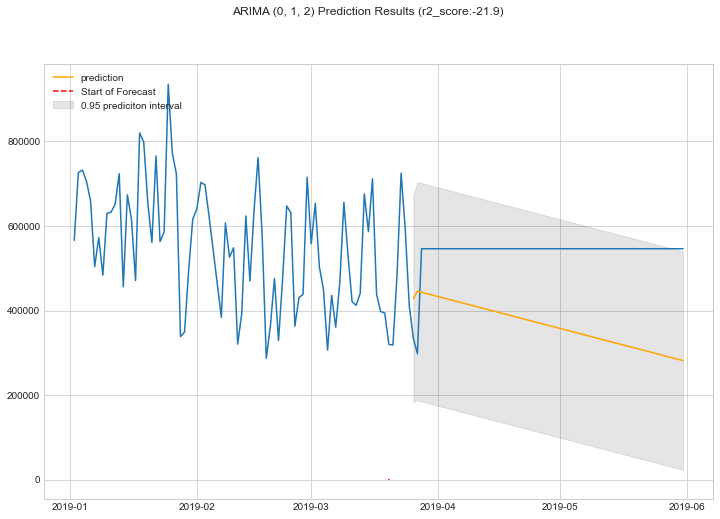

In [17]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(data.index, data.net_profit)
# 그냥 날짜 넣으니까 인식못해서 이렇게 함.
ax.vlines(pd.to_datetime('2019-03-20'), 0, 1000,linestyle = '--', color='r', 
         label='Start of Forecast');
ax.plot(pred_index, pred_value, label = 'prediction',color='orange')
# 요걸로 범위 채우기
ax.fill_between(pred_index, pred_lb, pred_ub, color='k', alpha=0.1,
               label='0.95 prediciton interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score:{round(r2,2)})')
plt.show()


In [22]:
pred_value

array([427893.24594218, 445777.0647083 , 443249.35189093, 440721.63907356,
       438193.92625619, 435666.21343883, 433138.50062146, 430610.78780409,
       428083.07498672, 425555.36216935, 423027.64935198, 420499.93653461,
       417972.22371724, 415444.51089987, 412916.7980825 , 410389.08526513,
       407861.37244776, 405333.65963039, 402805.94681302, 400278.23399565,
       397750.52117828, 395222.80836091, 392695.09554354, 390167.38272617,
       387639.6699088 , 385111.95709143, 382584.24427406, 380056.53145669,
       377528.81863932, 375001.10582195, 372473.39300458, 369945.68018722,
       367417.96736985, 364890.25455248, 362362.54173511, 359834.82891774,
       357307.11610037, 354779.403283  , 352251.69046563, 349723.97764826,
       347196.26483089, 344668.55201352, 342140.83919615, 339613.12637878,
       337085.41356141, 334557.70074404, 332029.98792667, 329502.2751093 ,
       326974.56229193, 324446.84947456, 321919.13665719, 319391.42383982,
       316863.71102245, 3

In [18]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(test_data,pred_value))
print("MSE: ", metrics.mean_squared_error(test_data,pred_value))

#print("MAE: ", metrics.mean_absolute_error(data2.visitors ,pred_value))
#print("MSE: ", metrics.mean_squared_error(data2.visitors,pred_value))

MAE:  181979.08022938154
MSE:  35434608917.20587


In [ ]:
# Diagnosis Check - SARIMA 

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

aic=[]
params=[]
for i in pdq: 
  for j in seasonal_pdq:
    try:
      model = SARIMAX(train_data.values, ordr=(i), seasonal_order =(j))
      model_fit = model.fit()
      print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic,2)}')
      aic.append(round(model_fit.aic,2))
      params.append((i,j))
    except:
      continue

In [ ]:
# Search optimal parameters

optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

In [ ]:
model_opt = SARIMAX(train_data.values, order=optimal[0][0][0], seasonal_order = optimal [0][0][1])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

In [ ]:
#use Model to Forecast -SARIMA 
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
prediction_ub = prediction.conf_int()[:0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)


In [ ]:

sarima_data=pd.DataFrame(predicted_value, predict_index)

sarima_data.to_csv('AK타운sarima.csv', index=False)


In [ ]:
pred[2][:,0]

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
ax.plot(data.index, data)
ax.vlines(pd.to_datetime('2019-03-28'), 0,700, linestyle ='--', color='r',
         label = 'Start of  Forcast')
ax.plot(predict_index, predicted_value, label='prediction')
ax.fill_between(predict_index, predicted_lb, prediction_ub, color='k',
               alpha= 0.1, label='0.95 prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0], optimal[0][0][1]} prediction results (r2score: {round(r2,2)})')
plt.show()

In [ ]:
print("MAE: ", metrics.mean_absolute_error(test_data,predicted_value))
print("MSE: ", metrics.mean_squared_error(test_data,predicted_value))


In [ ]:
# 3.4.3 Diagnosis Check- auto_arima

auto_arima_model = auto_arima(train_data, start_p=1, start_q=1,
                              max_p=3, max_q=3, m=12, seasonal=True,
                              d=1, D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True, 
                              stepwise=False)

In [ ]:
auto_arima_model.summary()

In [ ]:
# use Model to Forecast-auto_arima 
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
prediction_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

In [ ]:
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(data.index, data)
ax.vlines(pd.to_datetime('2019-03-28'), 0, 700, linestyle='--',
         color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, prediction_ub, predicted_lb,
               color='k', alpha=1, label='interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA({auto_arima_model.order, auto_arima_model.seasonal_order}) prediction results: {round(r2,2)}(r2 score)' )

In [ ]:
print("MAE: ", metrics.mean_absolute_error(test_data,predicted_value))
print("MSE: ", metrics.mean_squared_error(test_data,predicted_value))